### import libraries to use

In [1]:
from PIL import Image as pilImage
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

### functions to crop individual letters from sprite sheets

In [2]:
def explore_and_crop(matrix, visited, r, c, margin=4):
    h, w = matrix.shape
    visited[r][c] = 1
    q = [(r,c)]
    pixels = []
    rmin = rmax = r
    cmin = cmax = c
    while len(q) > 0:
        r,c = q.pop()
        rmin = min(rmin, r)
        rmax = max(rmax, r)
        cmin = min(cmin, c)
        cmax = max(cmax, c)
        pixels.append((r, c))
        for dr in (-1,0,1):
            rr = r + dr
            if rr < 0 or rr >= h:
                continue
            for dc in (-1,0,1):
                cc = c + dc
                if cc < 0 or cc >= w:
                    continue
                if visited[rr][cc] or matrix[rr][cc] == 0:
                    continue
                visited[rr][cc] = 1
                q.append((rr, cc))
    crop_h = rmax - rmin + 1 + 2 * margin
    crop_w = cmax - cmin + 1 + 2 * margin
    crop = np.zeros((crop_h, crop_w), dtype=np.uint8)
    for r,c in pixels:
        crop[margin + r - rmin][margin + c - cmin] = 1
    return crop
    
def get_image_crops(path):
    img = pilImage.open(path)
    matrix = np.asarray(np.asarray(img.convert("L")) > 0., dtype=np.uint8)
    h, w = matrix.shape
    visited = np.zeros((h,w), dtype=np.uint8)
    crops = []
    for r in range(h):
        for c in range(w):
            if visited[r][c] or matrix[r][c] == 0: continue
            crop = explore_and_crop(matrix, visited, r, c)
            if crop.shape[0] * crop.shape[1] > 200:
                crops.append(crop)
    print("%d crops detected!" % len(crops))
    return crops

### function to plot image crops (for sanity checking)

In [3]:
def plot_crops(crops, n_cols = 20, figsize=(15, 10), labels=None):
    n = len(crops)
    n_rows = n // n_cols + (n % n_cols > 0)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    for ax in axes.flat:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        for x in ('x', 'y'):
            ax.tick_params(
                axis=x, which='both', bottom=False, top=False, left=False, right=False)
    for i in range(n):
        r = i // n_cols
        c = i % n_cols
        ax = axes[r][c]        
        img = crops[i] * 255
        ax.imshow(img)
        if labels:
            ax.set_title('%d) %s' % (i, labels[i]))
        else:
            ax.set_title('%d)' % (i,))
    plt.show()

### Obtaining crops and labels from Training_01.png

In [4]:
train_crops_1 = get_image_crops('./Training_01.png')

180 crops detected!


In [5]:
train_labels_1 = [
     'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 's', 's',
     's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'd', 'd', 'd', 'd',
     'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'f', 'f', 'f', 'f', 'f', 'f',
     'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'g', 'g', 'f', 'g', 'g', 'g', 'g', 'g', 'g',
     'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
     'a', 'a', 'a', 'a', 'a', 'a', 'a', 's', 's', 'a', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's',
     's', 's', 's', 'd', 's', 'd', 's', 'd', 's', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'f', 'f',
     'd', 'f', 'd', 'f', 'f', 'f', 'd', 'd', 'd', 'f', 'f', 'f', 'f', 'd', 'f', 'f', 'f', 'f', 'f', 'f',
     'f', 'g', 'g', 'g', 'f', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
]

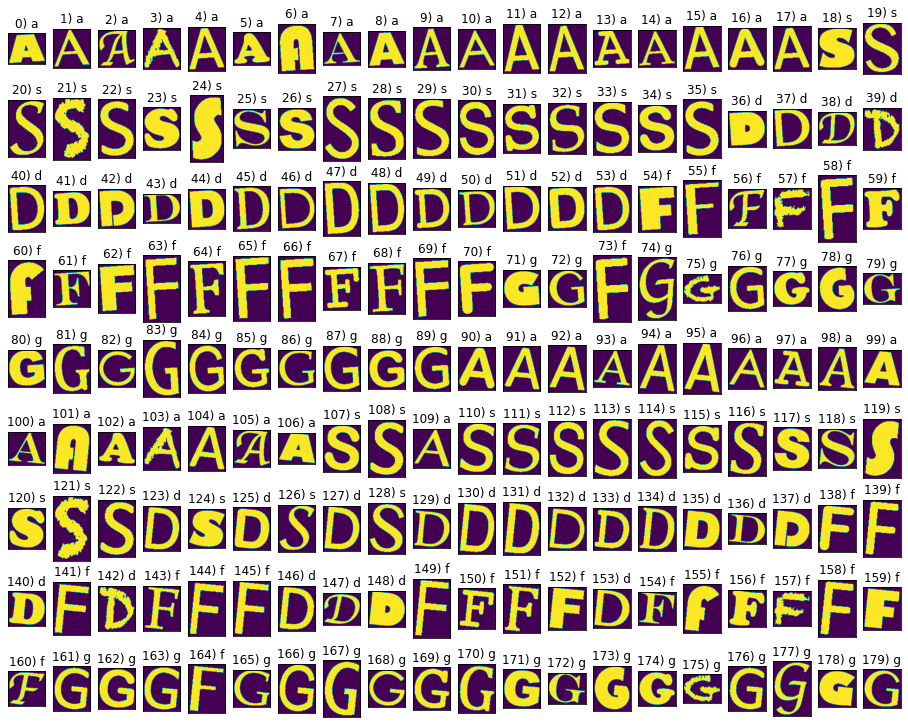

In [6]:
plot_crops(train_crops_1, n_cols=20, figsize=(16,13), labels=train_labels_1)

### Obtaining crops and labels from Training_02.png

In [7]:
train_crops_2 = get_image_crops('./Training_02.png')

180 crops detected!


In [8]:
train_labels_2 = [
     'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 's', 's',
     's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'd', 'd', 'd', 'd',
     'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'f', 'f', 'f', 'f', 'f', 'f',
     'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
     'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
     'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's',
     's', 's', 's', 's', 's', 's', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd',
     'd', 'd', 'd', 'd', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f',
     'f', 'f', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
]

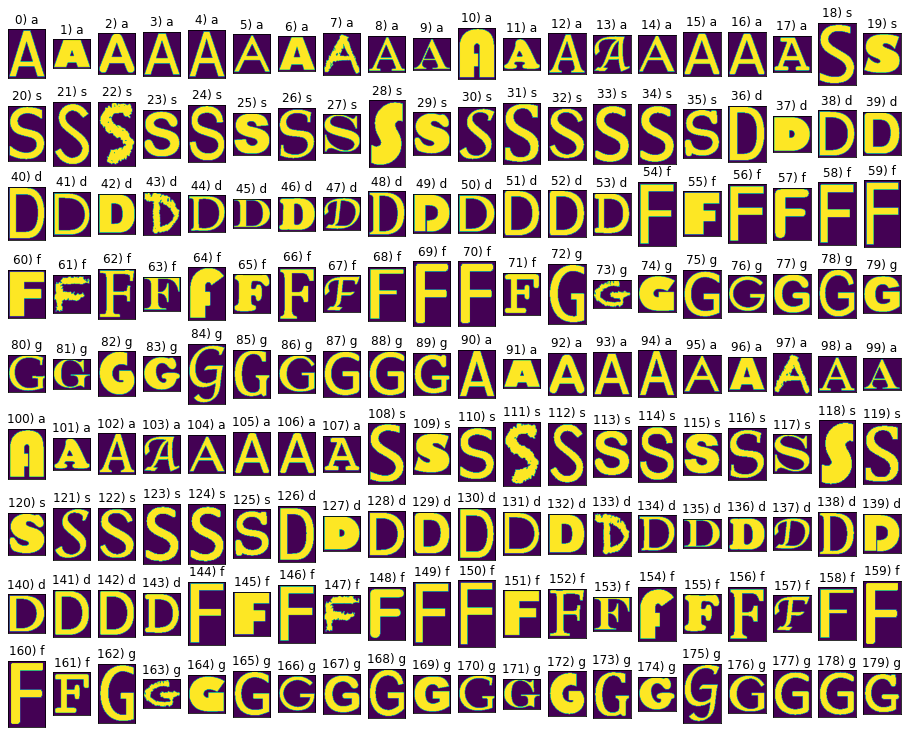

In [9]:
plot_crops(train_crops_2, n_cols=20, figsize=(16,13), labels=train_labels_2)

### Obtaining crops and labels from Testing.png

In [10]:
test_crops = get_image_crops('./Testing.png')

180 crops detected!


In [11]:
test_labels = [
     'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 's', 's',
     's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'd', 'd', 'd', 'd',
     'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'f', 'f', 'f', 'f', 'f', 'f',
     'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
     'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
     'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's',
     's', 's', 's', 's', 's', 's', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd',
     'd', 'd', 'd', 'd', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f',
     'f', 'f', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
]

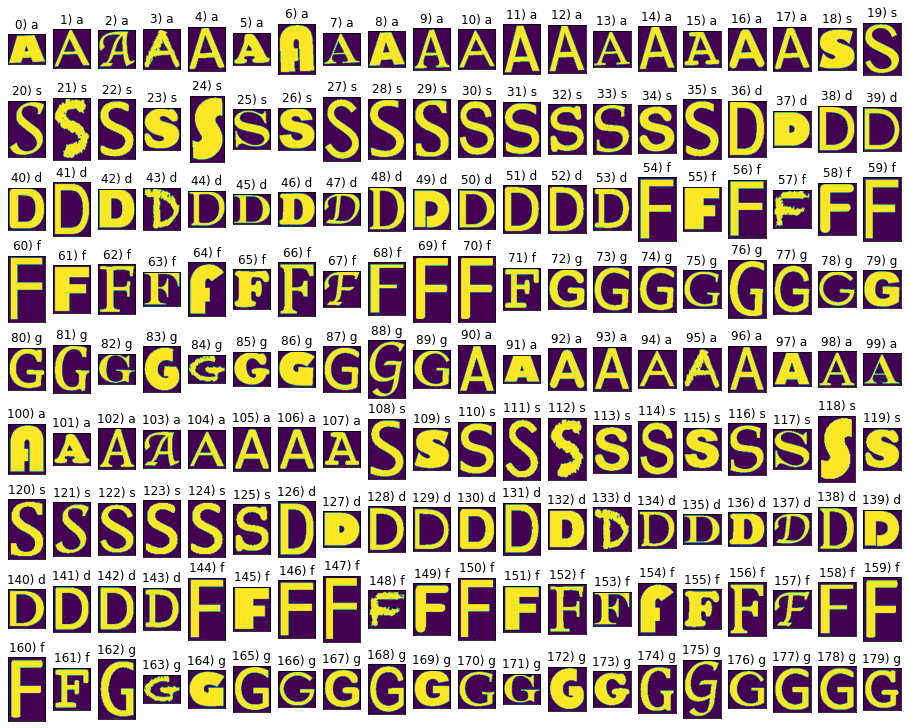

In [12]:
plot_crops(test_crops, n_cols=20, figsize=(16,13), labels=test_labels)

### function to obtain Hu Moments from binary image

In [14]:
def hu_moments(X):
    h, w = X.shape
    i = np.tile(np.arange(1, w+1, dtype=np.float64), (h, 1))
    j = np.tile(np.arange(1, h+1, dtype=np.float64), (w, 1)).T
    m = lambda r, s: ((i**r) * (j**s) * X).sum()
    m00 = m(0,0)
    i_bar = m(1,0) / m00
    j_bar = m(0,1) / m00
    _i = [(i - i_bar) ** x for x in range(4)]
    _j = [(j - j_bar) ** x for x in range(4)]
    mu = lambda r, s: ((_i[r]) * (_j[s]) * X).sum()
    mus = [[mu(r,s) for s in range(4)] for r in range(4)]
    nu = lambda r, s: mus[r][s] / mus[0][0] ** ((r+s)/2 + 1)
    
    phi1 = nu(2,0) + nu(0,2)
    phi2 = (nu(2,0) - nu(0,2)) ** 2 + 4 * nu(1,1) ** 2
    phi3 = (nu(3,0) - 3 * nu(1,2)) ** 2 + (3*nu(2,1) - nu(0,3)) ** 2
    phi4 = (nu(3,0) + nu(1,2)) ** 2 + (nu(2,1) + nu(0,3)) ** 2
    phi5 = (nu(3,0) - 3*nu(1,2))*(nu(3,0) + nu(1,2)) * ((nu(3,0)+nu(1,2))**2 - 3*(nu(2,1)+nu(0,3))**2) +\
           (3*nu(2,1) - nu(0,3))*(nu(2,1) + nu(0,3)) * (3*(nu(3,0)+nu(1,2))**2 - (nu(2,1)+nu(0,3))**2)
    phi6 = (nu(2,0) - nu(0,2))*((nu(3,0)+nu(1,2))**2 - (nu(2,1)+nu(0,3))**2) + 4*nu(1,1)*(nu(3,0)+nu(1,2))*(nu(2,1)+nu(0,3))
    phi7 = (3*nu(2,1) - nu(0,3))*(nu(3,0) + nu(1,2)) * ((nu(3,0)+nu(1,2))**2 - 3*(nu(2,1)+nu(0,3))**2) -\
           (nu(3,0) - 3*nu(1,2))*(nu(2,1) + nu(0,3)) * (3*(nu(3,0)+nu(1,2))**2 - (nu(2,1)+nu(0,3))**2)
    return (phi1, phi2, phi3, phi4, phi5, phi6, phi7)

### function to visualize features in a 2D plane

In [15]:
def visualize_features(features, labels):
    
    class2feat = {c:[] for c in "asdfg"}
    for f, l in zip(features, labels):
        class2feat[l].append(f)
    for l in "asdfg":
        class2feat[l] = np.array(class2feat[l])
        
    plt.figure(figsize=(12,12))
    colors = plt.cm.rainbow(np.linspace(0,1,5))
    for l, c in zip("asdfg", colors):
        X = class2feat[l]
        plt.scatter(X.T[0],X.T[1], color=c, label=l)

    plt.legend(bbox_to_anchor=(1,1))    
    plt.show()

### Compute features for Train and Test sets

In [16]:
train_crops = train_crops_1 + train_crops_2
train_labels = train_labels_1 + train_labels_2

In [17]:
train_features = np.array([hu_moments(x) for x in train_crops])

In [18]:
train_mean = train_features.mean(0)
train_std = train_features.std(0)

In [19]:
train_features_zscored = (train_features - train_mean) / train_std

In [20]:
test_features = np.array([hu_moments(x) for x in test_crops])

In [21]:
test_features_zscored = (test_features - train_mean) / train_std

### Visualize train set features (Hu moments 1 and 2)

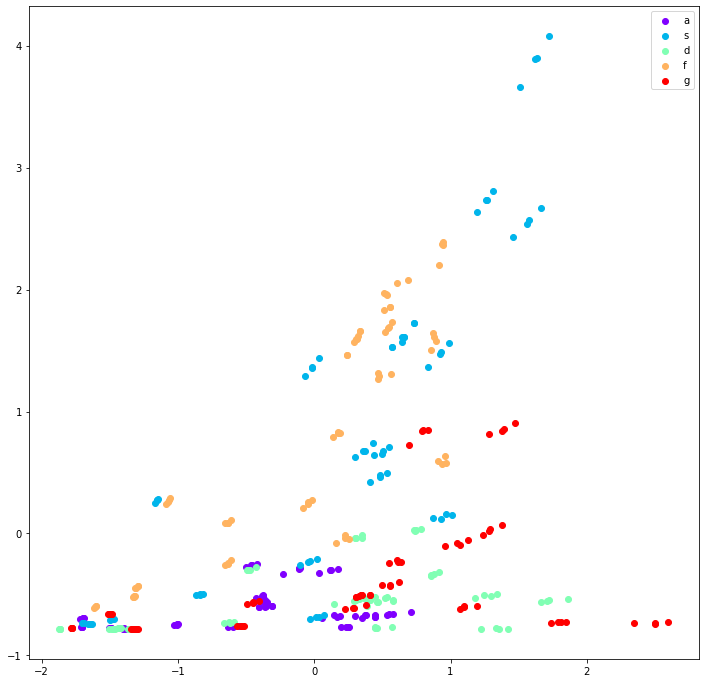

In [22]:
visualize_features(train_features_zscored[:,:2], train_labels)

### function to predict labels for test features using k nearest neighbors from train features

In [25]:
def KNN_pred(X_train, Y_train, X_test, dist_func, k):        
    n_train = len(X_train)
    n_test = len(X_test)
    k = min(k, n_train)
    pred_labels = []
    for i in range(n_test):
        pairs = [(dist_func(X_test[i], X_train[j]), j) for j in range(n_train)]
        pairs.sort()        
        max_freq = 0
        counts = {}
        for j in range(k):
            label = Y_train[pairs[j][1]]
            freq = counts[label] = counts.get(label,0) + 1
            if max_freq < freq:
                max_freq = freq
                pred_label = label
        pred_labels.append(pred_label)
    return pred_labels    

### function to plot confusion matrix

In [26]:
def plot_confusion_matrix(y_test, y_pred, figsize=(10,7)):
    classes = "asdfg"
    class2index = {c:i for i,c in enumerate(classes)}
    n = len(classes)
    matrix = np.zeros((n,n),dtype=np.int32)
    for a, b in zip(y_test, y_pred):
        ai = class2index[a]
        bi = class2index[b]
        matrix[ai][bi] += 1    
    df_cm = pd.DataFrame(matrix, index = list(classes), columns = list(classes))
    plt.figure(figsize = figsize)
    sn.heatmap(df_cm, annot=True)

### function to compute test accuracy

In [27]:
def get_accuracy(y_test, y_pred):
    return sum(a == b for a,b in zip(y_test, y_pred)) / len(y_test)

### find k that yields highest accuracy in KNN

In [28]:
euclidean_square_distance = lambda x,y: ((x - y)**2).sum()

In [29]:
best_k = None
best_acc = 0
for k in range(1, 30):
    pred = KNN_pred(train_features_zscored, train_labels, test_features_zscored, euclidean_square_distance, k)
    acc = get_accuracy(test_labels, pred)
    if acc > best_acc:
        best_acc = acc
        best_k = k

In [30]:
print("best_k = %d, best_acc = %lf" % (best_k, best_acc))

best_k = 1, best_acc = 0.994444


### plot confusion matrix for best KNN result

In [31]:
best_pred = KNN_pred(train_features_zscored, train_labels, test_features_zscored, euclidean_square_distance, best_k)

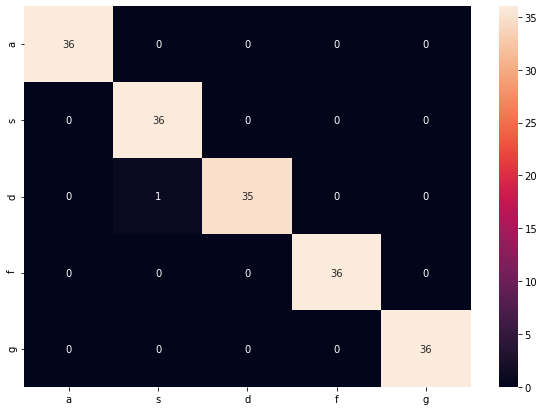

In [32]:
plot_confusion_matrix(test_labels, best_pred)